In [1]:
import pandas as pd #version 1.4.4
import numpy as np #version 1.21.5
import matplotlib.pyplot as plt
import sklearn

In [2]:
#this function reads in the data set

dance_injuries_2023= pd.read_csv('/Users/christinegurek/Desktop/Data 400 Docs/Mini-Project/Dance Mini Project Research/csv/Injuries_2023.csv')
dance_injuries_2022= pd.read_csv('/Users/christinegurek/Desktop/Data 400 Docs/Mini-Project/Dance Mini Project Research/csv/Injuries_2022.csv')
dance_injuries_2021= pd.read_csv('/Users/christinegurek/Desktop/Data 400 Docs/Mini-Project/Dance Mini Project Research/csv/Injuries_2021.csv')
dance_injuries_2020= pd.read_csv('/Users/christinegurek/Desktop/Data 400 Docs/Mini-Project/Dance Mini Project Research/csv/Injuries_2020.csv')
dance_injuries_2019= pd.read_csv('/Users/christinegurek/Desktop/Data 400 Docs/Mini-Project/Dance Mini Project Research/csv/Injuries_2019.csv')
dance_injuries_2018= pd.read_csv('/Users/christinegurek/Desktop/Data 400 Docs/Mini-Project/Dance Mini Project Research/csv/Injuries_2018.csv')
dance_injuries_2017= pd.read_csv('/Users/christinegurek/Desktop/Data 400 Docs/Mini-Project/Dance Mini Project Research/csv/Injuries_2017.csv')
dance_injuries_2016= pd.read_csv('/Users/christinegurek/Desktop/Data 400 Docs/Mini-Project/Dance Mini Project Research/csv/Injuries_2016.csv')
dance_injuries_2015= pd.read_csv('/Users/christinegurek/Desktop/Data 400 Docs/Mini-Project/Dance Mini Project Research/csv/Injuries_2015.csv')
dance_injuries_2014= pd.read_csv('/Users/christinegurek/Desktop/Data 400 Docs/Mini-Project/Dance Mini Project Research/csv/Injuries_2014.csv')

injuries_total = pd.concat([dance_injuries_2014,dance_injuries_2015,dance_injuries_2016,dance_injuries_2017,dance_injuries_2018,dance_injuries_2019,dance_injuries_2020,dance_injuries_2021,dance_injuries_2022,dance_injuries_2023], axis=0)
injuries_total = injuries_total.drop(columns=['Product_1', 'Product_2', 'Product_3'])
injuries_total


,CPSC_Case_Number,Treatment_Date,Age,Body_Part,Diagnosis,Narrative
0,140122872,1/6/14,18,83,64,"18 YO F, C/O LT FOOT PAIN AFTER PERFORMING MOD..."
1,140130758,1/9/14,12,36,64,12YR F DANCING IN DANCE RECITAL;DX LOW LEG STRAIN
2,140136188,1/15/14,8,79,64,8YF TAKING DANCING CLASS NOW WITH UPPER ABD PA...
3,140137784,1/16/14,13,89,64,13YOF AT A SCHOOL DANCE AND WHILE DANCING FELT...
4,140141186,1/15/14,13,79,64,13 YOF PARTICIPATING IN DANCE CLASS STRAINED R...
...,...,...,...,...,...,...
494,240123734,12/4/23,8,35,55,8YOF WAS IN DANCE CLASS AND WAS PERFORMING A D...
495,240158321,12/4/23,12,79,71,12YOF WITH LOWER BACK AND FLANK PAIN FOR 1 WEE...
496,240162316,12/4/23,14,35,64,14YOF INJURING HER LEFT KNEE DURING DANCE CLAS...
497,240166190,12/12/23,11,35,71,11YOF FELL ON THE FLOOR DURING DANCE CLASS. DX...


In [3]:
injuries_total.Diagnosis.value_counts()


64    1841
71    1352
57     521
53     448
55     225
62     171
59     143
52     138
60      17
56       8
72       8
74       7
61       6
58       6
68       6
66       4
65       3
51       2
42       1
50       1
54       1
41       1
46       1
Name: Diagnosis, dtype: int64

<AxesSubplot:>

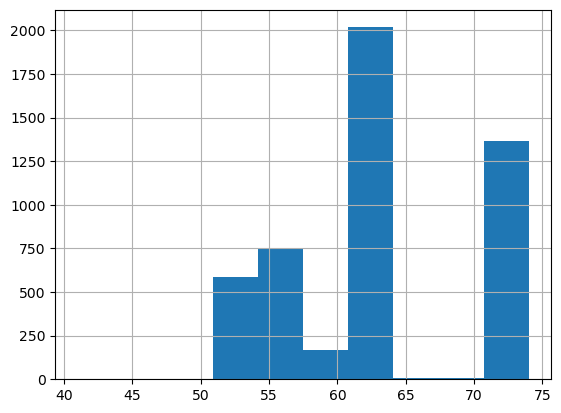

In [4]:
injuries_total["Diagnosis"].hist()

<AxesSubplot:>

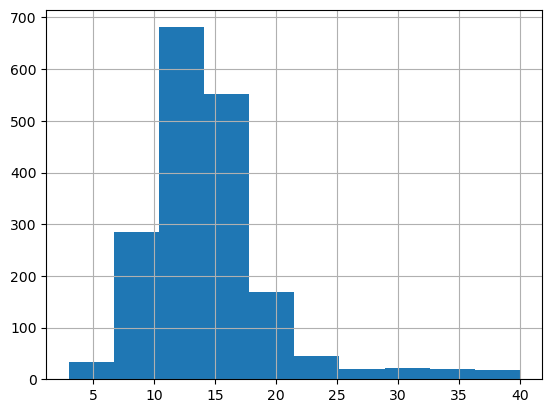

In [5]:
injuries_total[injuries_total.Diagnosis==64]["Age"].hist()

<AxesSubplot:>

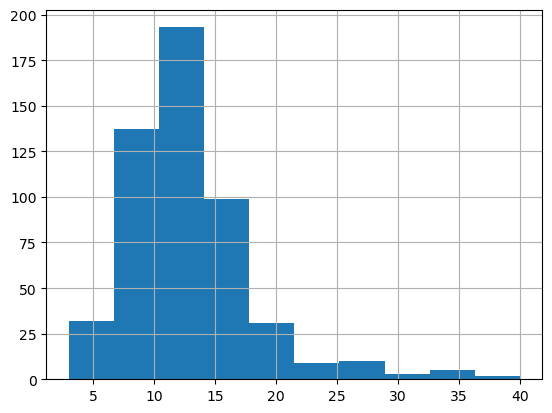

In [6]:
injuries_total[injuries_total.Diagnosis==57]["Age"].hist()

In [7]:
# #text analysis
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk

# Load the data
narratives = injuries_total['Narrative'].dropna()  # Drop any missing values in 'Narrative' column

# Preprocess text data
nltk.download('stopwords')
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words=stop_words)
narrative_vectors = vectorizer.fit_transform(narratives)

# Train the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components for more/fewer topics
lda_model.fit(narrative_vectors)

# Extract and display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}: ", " ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))

no_top_words = 10  # Number of words per topic to display
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christinegurek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1:  fell yof strain neck shoulder class dx back pain dance
Topic 2:  practice yo hurt twisted yof class sprain dx dance ankle
Topic 3:  sprain elbow left fell yof pain class dx dance foot
Topic 4:  hit injury chest hip head class fell pain dx dance
Topic 5:  dislocation right class pop felt left pain dx dance knee


In [8]:
injuries_sprain = pd.get_dummies(injuries_total["Diagnosis"])
injuries_total['Sprain'] = injuries_sprain.get(64,0)
injuries_total = injuries_total.drop(columns=['Diagnosis'])
injuries_total

,CPSC_Case_Number,Treatment_Date,Age,Body_Part,Narrative,Sprain
0,140122872,1/6/14,18,83,"18 YO F, C/O LT FOOT PAIN AFTER PERFORMING MOD...",1
1,140130758,1/9/14,12,36,12YR F DANCING IN DANCE RECITAL;DX LOW LEG STRAIN,1
2,140136188,1/15/14,8,79,8YF TAKING DANCING CLASS NOW WITH UPPER ABD PA...,1
3,140137784,1/16/14,13,89,13YOF AT A SCHOOL DANCE AND WHILE DANCING FELT...,1
4,140141186,1/15/14,13,79,13 YOF PARTICIPATING IN DANCE CLASS STRAINED R...,1
...,...,...,...,...,...,...
494,240123734,12/4/23,8,35,8YOF WAS IN DANCE CLASS AND WAS PERFORMING A D...,0
495,240158321,12/4/23,12,79,12YOF WITH LOWER BACK AND FLANK PAIN FOR 1 WEE...,0
496,240162316,12/4/23,14,35,14YOF INJURING HER LEFT KNEE DURING DANCE CLAS...,1
497,240166190,12/12/23,11,35,11YOF FELL ON THE FLOOR DURING DANCE CLASS. DX...,0


[[475 155]
 [179 174]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       630
           1       0.53      0.49      0.51       353

    accuracy                           0.66       983
   macro avg       0.63      0.62      0.63       983
weighted avg       0.66      0.66      0.66       983

|--- Body_Part <= 37.50
|   |--- Treatment_Year <= 2020.50
|   |   |--- Treatment_Month <= 5.50
|   |   |   |--- Body_Part <= 36.50
|   |   |   |   |--- Body_Part <= 33.50
|   |   |   |   |   |--- Age <= 9.50
|   |   |   |   |   |   |--- Age <= 7.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Age >  7.50
|   |   |   |   |   |   |   |--- Treatment_Year <= 2019.50
|   |   |   |   |   |   |   |   |--- Age <= 8.50
|   |   |   |   |   |   |   |   |   |--- Treatment_Year <= 2016.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Treatment_Year >  2016.50
|   |   |   |   |

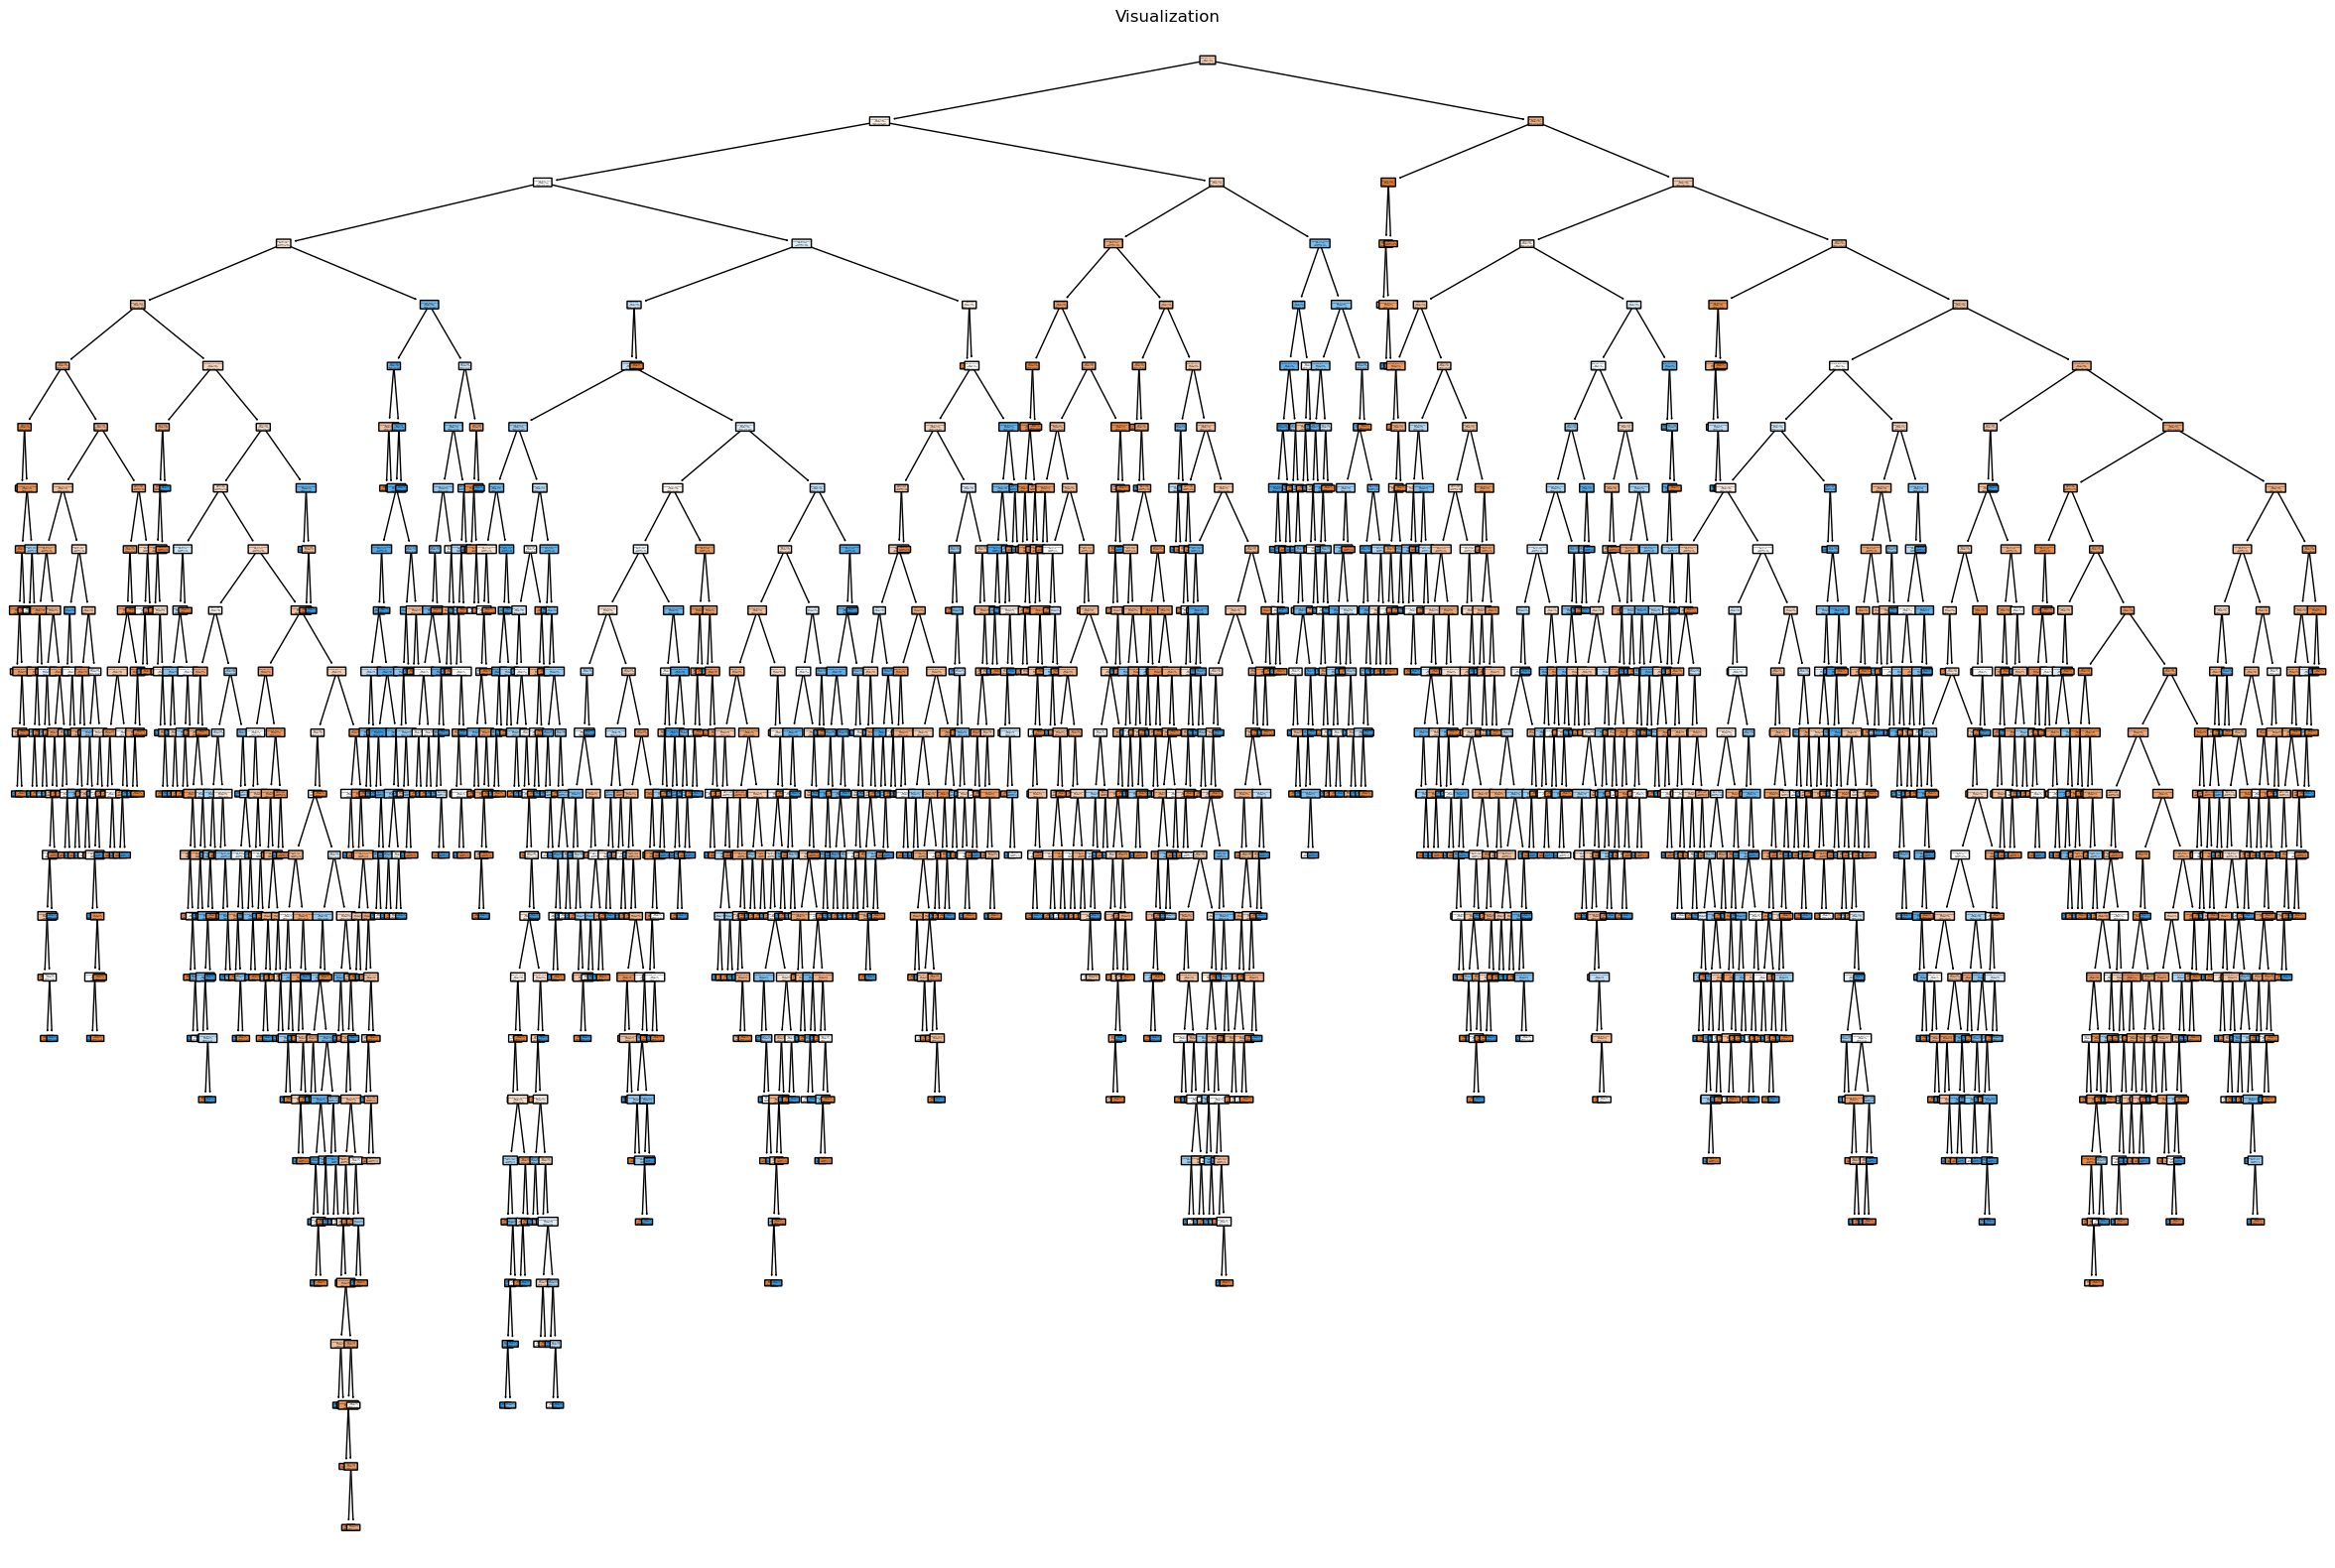

           Feature  Importance
1        Body_Part    0.330831
0              Age    0.281872
3  Treatment_Month    0.212899
2   Treatment_Year    0.174397


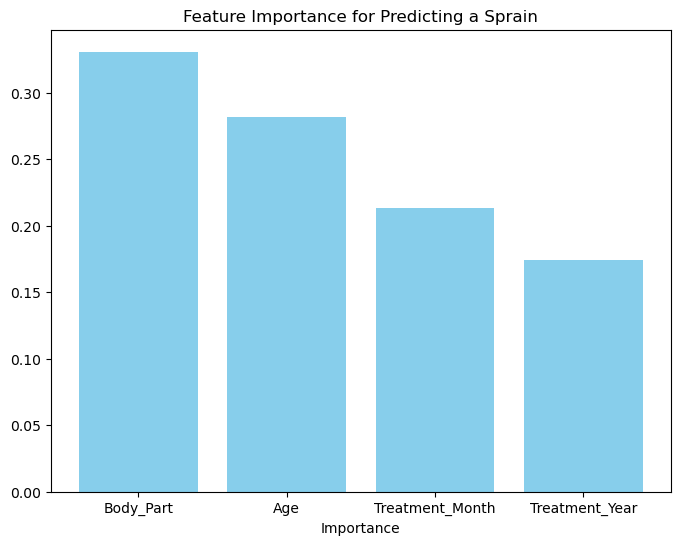

[[630   0]
 [353   0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       630
           1       0.00      0.00      0.00       353

    accuracy                           0.64       983
   macro avg       0.32      0.50      0.39       983
weighted avg       0.41      0.64      0.50       983



In [9]:
import pandas as pd #version 1.4.4
import sklearn as skl #version 1.0.2
import numpy as np # version 1.21.5
import warnings as ww

from sklearn.utils import resample #version 1.0.2
from sklearn.model_selection import train_test_split #version 1.0.2
from sklearn.ensemble import RandomForestClassifier #version 1.0.2
from sklearn.tree import export_text #version 1.0.2
from sklearn.tree import plot_tree
from sklearn.svm import SVC #version 1.0.2

from sklearn.metrics import confusion_matrix #version 1.0.2
from sklearn.metrics import classification_report #version 1.0.2

ww.filterwarnings("ignore")

# Fracture = 57
# Sprain = 64

# Convert Treatment_Date to datetime format, then extract year and month as features
injuries_total['Treatment_Date'] = pd.to_datetime(injuries_total['Treatment_Date'], errors='coerce')
injuries_total['Treatment_Year'] = injuries_total['Treatment_Date'].dt.year
injuries_total['Treatment_Month'] = injuries_total['Treatment_Date'].dt.month

# Drop the original Treatment_Date as we now have numerical year and month columns
injuries_total = injuries_total.drop(columns=['Treatment_Date', 'Narrative','CPSC_Case_Number']) 


#classification models

# this splits the data into training and test sets

y = injuries_total["Sprain"]
x = injuries_total.loc[:, injuries_total.columns != "Sprain"] 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

#Random Forest Classifier
RF_model1 = RandomForestClassifier()
RF_model1.fit(X_train, y_train)
y_pred1 = RF_model1.predict(X_test)
y_pred1

# this runs a confusion matrix and classification report so we can see 
# different error metrics of the model

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

#this displays the decision rules of the random forest classifier

decision = RF_model1.estimators_[0]
all_decisions = export_text(decision, feature_names=list(x.columns))
print(all_decisions)

plt.figure(figsize = (30,20))
plot_tree(
    RF_model1.estimators_[0],
    feature_names = list(x.columns),
    class_names = ['No Sprain', 'Sprain'],
    filled = True,
    rounded = True, 
    proportion = False
)
plt.title("Visualization")
plt.show()

# this gives us the names of the top 5 most important features on the
# model
importance = RF_model1.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
print(importance_df)


plt.figure(figsize = (8,6))
plt.bar(importance_df['Feature'],importance_df['Importance'], color = 'skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting a Sprain')
plt.show()

#SVM MOdel
SVM_model1 = SVC()
SVM_model1.fit(X_train, y_train)
y_pred_SVM1 = SVM_model1.predict(X_test)
y_pred_SVM1

# this runs a confusion matrix and classification report so we can see 
# different error metrics of the model

print(confusion_matrix(y_test, y_pred_SVM1))
print(classification_report(y_test, y_pred_SVM1, zero_division = 0.0))



In [10]:
injuries_total = pd.concat([dance_injuries_2014,dance_injuries_2015,dance_injuries_2016,dance_injuries_2017,dance_injuries_2018,dance_injuries_2019,dance_injuries_2020,dance_injuries_2021,dance_injuries_2022,dance_injuries_2023], axis=0)
injuries_total = injuries_total.drop(columns=['Product_1', 'Product_2', 'Product_3'])
injuries_total
injuries_sprain = pd.get_dummies(injuries_total["Diagnosis"])
injuries_total['Fractures'] = injuries_sprain.get(57,0)
injuries_total = injuries_total.drop(columns=['Diagnosis'])
injuries_total

,CPSC_Case_Number,Treatment_Date,Age,Body_Part,Narrative,Fractures
0,140122872,1/6/14,18,83,"18 YO F, C/O LT FOOT PAIN AFTER PERFORMING MOD...",0
1,140130758,1/9/14,12,36,12YR F DANCING IN DANCE RECITAL;DX LOW LEG STRAIN,0
2,140136188,1/15/14,8,79,8YF TAKING DANCING CLASS NOW WITH UPPER ABD PA...,0
3,140137784,1/16/14,13,89,13YOF AT A SCHOOL DANCE AND WHILE DANCING FELT...,0
4,140141186,1/15/14,13,79,13 YOF PARTICIPATING IN DANCE CLASS STRAINED R...,0
...,...,...,...,...,...,...
494,240123734,12/4/23,8,35,8YOF WAS IN DANCE CLASS AND WAS PERFORMING A D...,0
495,240158321,12/4/23,12,79,12YOF WITH LOWER BACK AND FLANK PAIN FOR 1 WEE...,0
496,240162316,12/4/23,14,35,14YOF INJURING HER LEFT KNEE DURING DANCE CLAS...,0
497,240166190,12/12/23,11,35,11YOF FELL ON THE FLOOR DURING DANCE CLASS. DX...,0


In [ ]:
import pandas as pd #version 1.4.4
import sklearn as skl #version 1.0.2
import numpy as np # version 1.21.5
import warnings as ww

from sklearn.utils import resample #version 1.0.2
from sklearn.model_selection import train_test_split #version 1.0.2
from sklearn.ensemble import RandomForestClassifier #version 1.0.2
from sklearn.tree import export_text #version 1.0.2
from sklearn.svm import SVC #version 1.0.2

from sklearn.metrics import confusion_matrix #version 1.0.2
from sklearn.metrics import classification_report #version 1.0.2

ww.filterwarnings("ignore")

# Fracture = 57
# Sprain = 64

# Convert Treatment_Date to datetime format, then extract year and month as features
injuries_total['Treatment_Date'] = pd.to_datetime(injuries_total['Treatment_Date'], errors='coerce')
injuries_total['Treatment_Year'] = injuries_total['Treatment_Date'].dt.year
injuries_total['Treatment_Month'] = injuries_total['Treatment_Date'].dt.month

# Drop the original Treatment_Date as we now have numerical year and month columns
injuries_total = injuries_total.drop(columns=['Treatment_Date', 'Narrative', 'CPSC_Case_Number']) 



#classification models

# this splits the data into training and test sets

y = injuries_total["Fractures"]
x = injuries_total.loc[:, injuries_total.columns != "Fractures"] 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

#Random Forest Classifier
RF_model1 = RandomForestClassifier()
RF_model1.fit(X_train, y_train)
y_pred1 = RF_model1.predict(X_test)
y_pred1

# this runs a confusion matrix and classification report so we can see 
# different error metrics of the model

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

#this displays the decision rules of the random forest classifier

decision = RF_model1.estimators_[0]
all_decisions = export_text(decision, feature_names=list(x.columns))
print(all_decisions)

plt.figure(figsize = (30,20))
plot_tree(
    RF_model1.estimators_[0],
    feature_names = list(x.columns),
    class_names = ['No Fracture', 'Fracture'],
    filled = True,
    rounded = True, 
    proportion = False
)
plt.title("Visualization")
plt.show()

# this gives us the names of the top 5 most important features on the
# model
importance = RF_model1.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
print(importance_df)


plt.figure(figsize = (8,6))
plt.bar(importance_df['Feature'],importance_df['Importance'], color = 'skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting a Fracture')
plt.show()


# #SVM MOdel
SVM_model1 = SVC()
SVM_model1.fit(X_train, y_train)
y_pred_SVM1 = SVM_model1.predict(X_test)
y_pred_SVM1

# this runs a confusion matrix and classification report so we can see 
# different error metrics of the model

print(confusion_matrix(y_test, y_pred_SVM1))
print(classification_report(y_test, y_pred_SVM1, zero_division = 0.0))



[[832  28]
 [ 98  25]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       860
           1       0.47      0.20      0.28       123

    accuracy                           0.87       983
   macro avg       0.68      0.59      0.61       983
weighted avg       0.84      0.87      0.85       983

|--- Treatment_Year <= 2019.50
|   |--- Age <= 12.50
|   |   |--- Treatment_Month <= 4.50
|   |   |   |--- Treatment_Month <= 2.50
|   |   |   |   |--- Body_Part <= 34.50
|   |   |   |   |   |--- Age <= 9.50
|   |   |   |   |   |   |--- Body_Part <= 32.50
|   |   |   |   |   |   |   |--- Treatment_Year <= 2018.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Treatment_Year >  2018.50
|   |   |   |   |   |   |   |   |--- Body_Part <= 31.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- Body_Part >  31.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   